In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("C:\\python\\Online_Food_Order\\Onlinefoods.csv")

In [3]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
df.rename(columns={"Age":"age","Gender":"gender","Marital Status":"relationship","Occupation":"work","Monthly Income":"income",
                  "Educational Qualifications":"degree","Family size":"family_size","Pin code":"pincode","Output":"output","Feedback":"feedback"},inplace=True)

In [5]:
df.drop(columns=["Unnamed: 12"],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           388 non-null    int64  
 1   gender        388 non-null    object 
 2   relationship  388 non-null    object 
 3   work          388 non-null    object 
 4   income        388 non-null    object 
 5   degree        388 non-null    object 
 6   family_size   388 non-null    int64  
 7   latitude      388 non-null    float64
 8   longitude     388 non-null    float64
 9   pincode       388 non-null    int64  
 10  output        388 non-null    object 
 11  feedback      388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [7]:
# income datatype correction
df["income"].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [8]:
income_map = {'No Income': 0,
           'Below Rs.10000': 1,
           '10001 to 25000': 2,
           '25001 to 50000': 3,
           'More than 50000': 4}
df["income"]=df['income'].replace(income_map).infer_objects(copy=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_6196\3752182692.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["income"]=df['income'].replace(income_map).infer_objects(copy=False)


In [9]:
df.head()

,age,gender,relationship,work,income,degree,family_size,latitude,longitude,pincode,output,feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,1,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,1,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,1,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [10]:
df.describe()

,age,income,family_size,latitude,longitude,pincode
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,1.469072,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.591831,1.351025,0.044489,0.051354,31.399609
min,18.000000,0.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,0.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,1.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,3.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,4.000000,6.000000,13.102000,77.758200,560109.000000


In [11]:
df.head()

,age,gender,relationship,work,income,degree,family_size,latitude,longitude,pincode,output,feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,1,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,1,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,1,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


<Axes: ylabel='Density'>

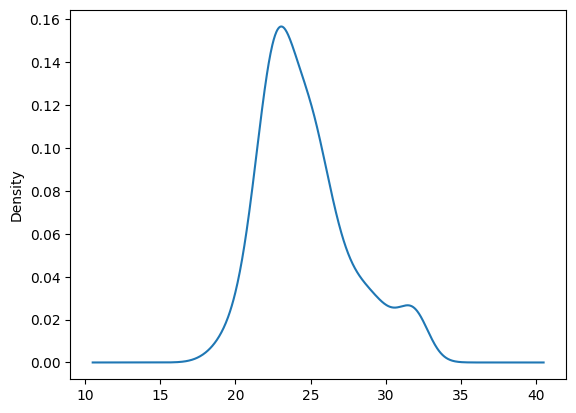

In [12]:
df["age"].plot(kind="kde")

In [13]:
df["age"].describe()

count    388.000000
mean      24.628866
std        2.975593
min       18.000000
25%       23.000000
50%       24.000000
75%       26.000000
max       33.000000
Name: age, dtype: float64

In [14]:
# Avg income by age

<Axes: title={'center': 'Age vs Income'}, xlabel='age', ylabel='income'>

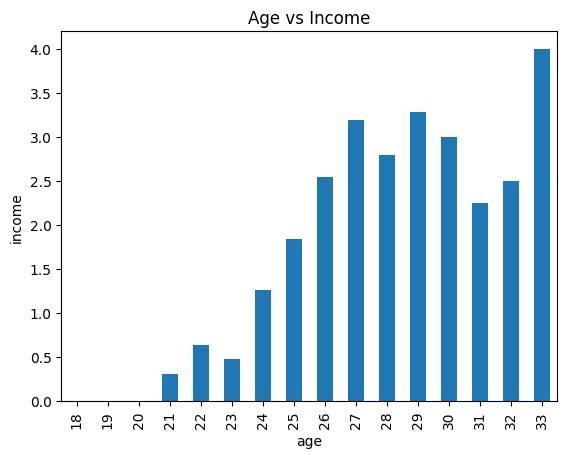

In [15]:
avg_income = df.groupby("age").income.mean()
avg_income.plot(kind="bar",ylabel="income",title="Age vs Income")
# people of age 18,19 and 20 have no income and age 33 have max income and we can also analyze that 29 years old earns more than  30,31,32

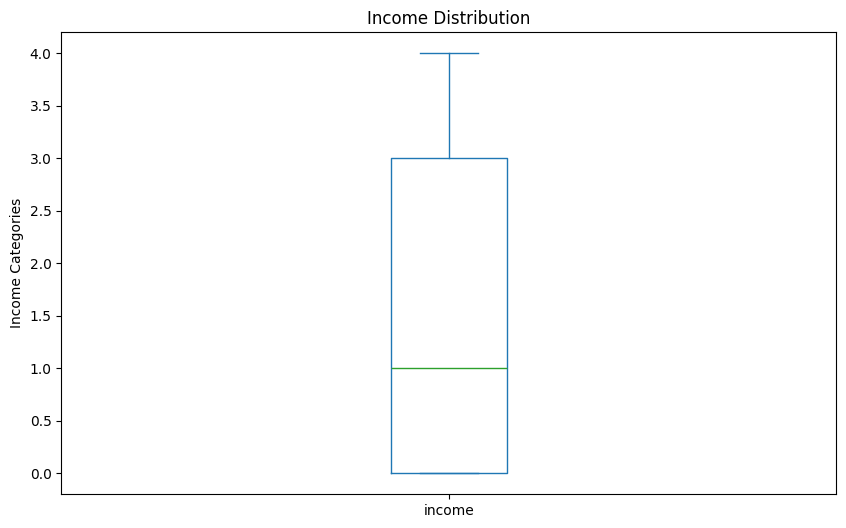

In [16]:
plt.figure(figsize=(10, 6))
df['income'].plot(kind='box', title='Income Distribution')
plt.ylabel('Income Categories')
plt.show()

<Axes: xlabel='income'>

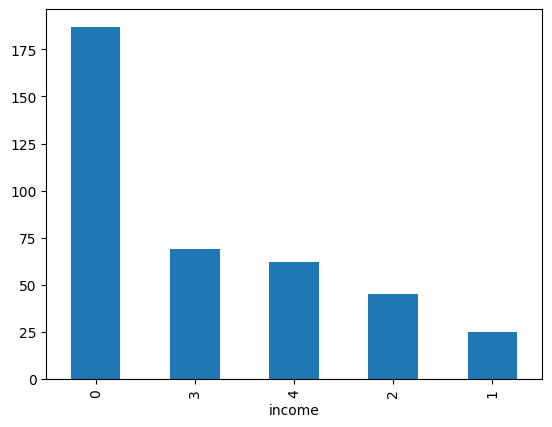

In [17]:
df["income"].value_counts().plot(kind="bar")
# so the broke people i mean people with no income are ordering food online just like me that's sad haha


In [18]:
df.head()

,age,gender,relationship,work,income,degree,family_size,latitude,longitude,pincode,output,feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,1,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,1,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,1,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


<Axes: xlabel='gender'>

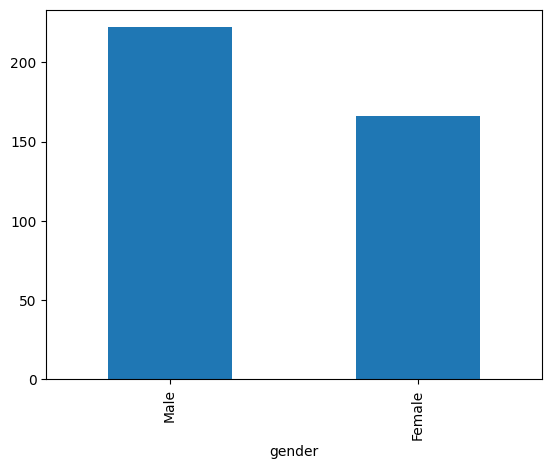

In [19]:
df["gender"].value_counts().plot(kind="bar")
# There are few more male who order food than female makes sense because these extra males are those who don't know how to cook haha

In [20]:
# gender vs income

In [21]:
avg_income = df.groupby("gender").income.mean()
avg_income
# male earns a little bit more than females 

gender
Female    1.228916
Male      1.648649
Name: income, dtype: float64

<Axes: xlabel='gender'>

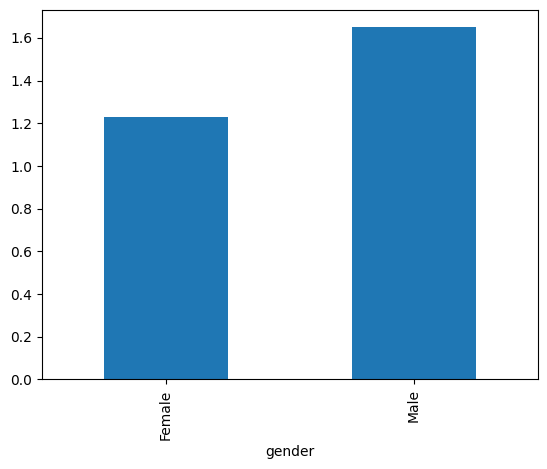

In [22]:
avg_income.plot(kind="bar")

In [23]:
df["work"].value_counts()

work
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64

In [24]:
work_by_gender=df.groupby("gender").work
work_by_gender.value_counts()

gender  work          
Female  Student            92
        Employee           49
        Self Employeed     16
        House wife          9
Male    Student           115
        Employee           69
        Self Employeed     38
Name: count, dtype: int64

<Axes: xlabel='gender,work'>

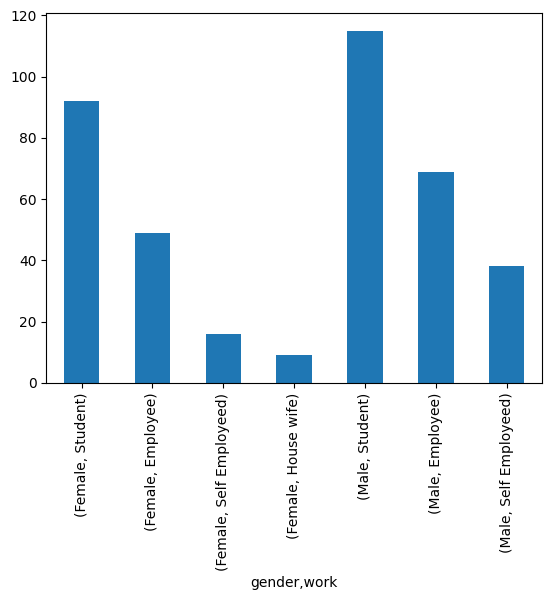

In [25]:
work_by_gender.value_counts().plot(kind="bar")

In [26]:
df.head()

,age,gender,relationship,work,income,degree,family_size,latitude,longitude,pincode,output,feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,1,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,1,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,1,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [27]:
df["relationship"].value_counts()

relationship
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64

In [28]:
# degree and income 

In [29]:
df["degree"].value_counts()

degree
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64

<Axes: title={'center': 'Income vs Degree'}, xlabel='degree,income', ylabel='count'>

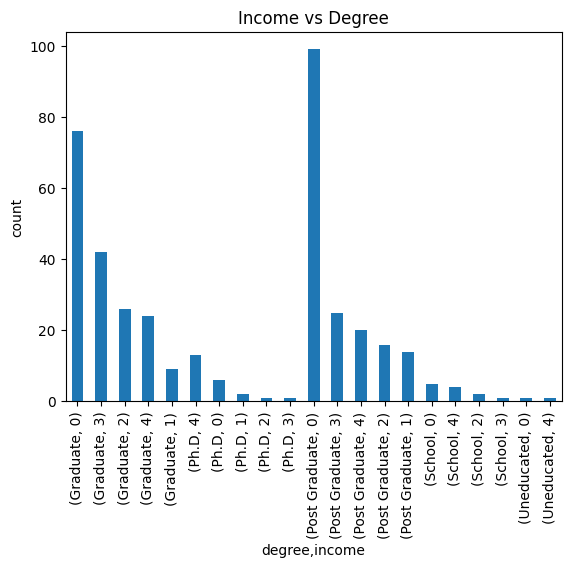

In [30]:
degree_by_income = df.groupby("degree").income
degree_by_income.value_counts().plot(kind="bar",ylabel="count",title="Income vs Degree")
# there are over 100 people who have a post graduate degree and earns 0 and still order online food they totally have audacity

<Axes: title={'center': 'Gender vs Degree'}, xlabel='degree,gender', ylabel='count'>

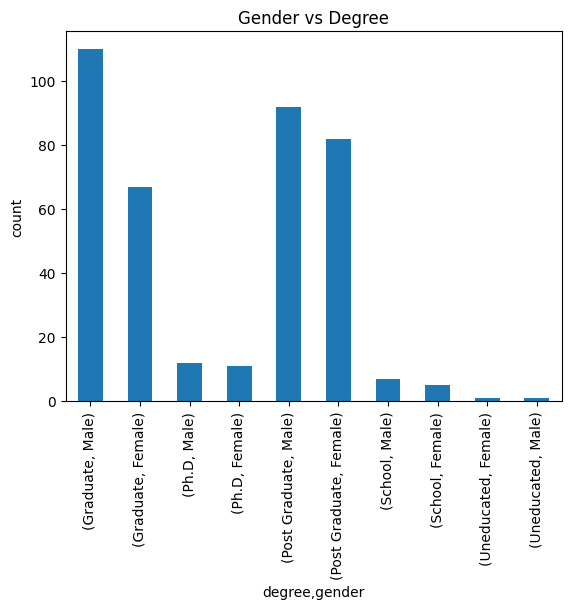

In [31]:
degree_by_income = df.groupby("degree").gender
degree_by_income.value_counts().plot(kind="bar",ylabel="count",title="Gender vs Degree")

In [32]:
highest_earners = df.groupby(['degree', 'gender'])['income'].agg('mean').reset_index().sort_values(by="income")
print(highest_earners.pivot)

<bound method DataFrame.pivot of           degree  gender    income
6         School  Female  0.000000
8     Uneducated  Female  0.000000
4  Post Graduate  Female  1.085366
2           Ph.D  Female  1.181818
5  Post Graduate    Male  1.217391
0       Graduate  Female  1.522388
1       Graduate    Male  1.645455
7         School    Male  3.285714
3           Ph.D    Male  3.833333
9     Uneducated    Male  4.000000>


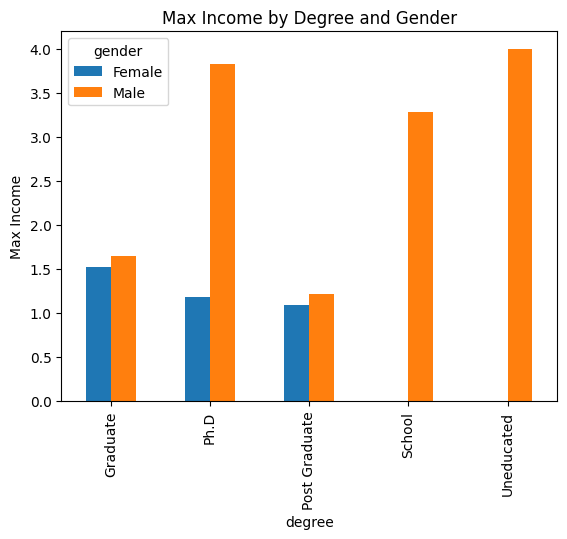

In [33]:
highest_earners.pivot(index='degree', columns='gender', values='income').plot(kind='bar')
plt.ylabel('Max Income')
plt.title('Max Income by Degree and Gender')
plt.show()

<Axes: xlabel='output'>

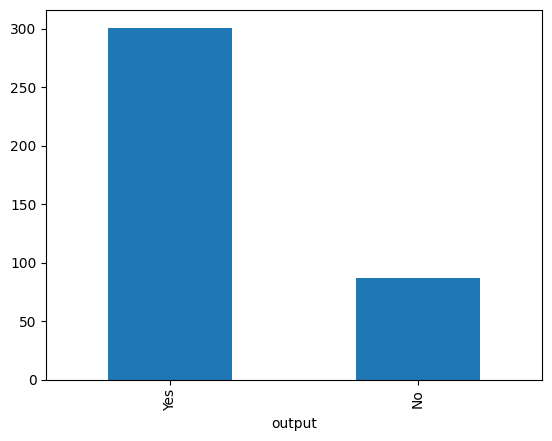

In [34]:
df["output"].value_counts().plot(kind="bar")

<Axes: xlabel='feedback'>

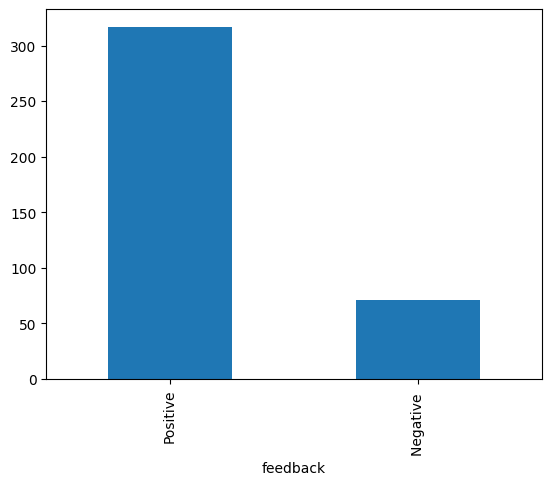

In [35]:
df["feedback"].value_counts().plot(kind="bar")

In [36]:
df.head()

,age,gender,relationship,work,income,degree,family_size,latitude,longitude,pincode,output,feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,1,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,1,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,1,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


<Axes: >

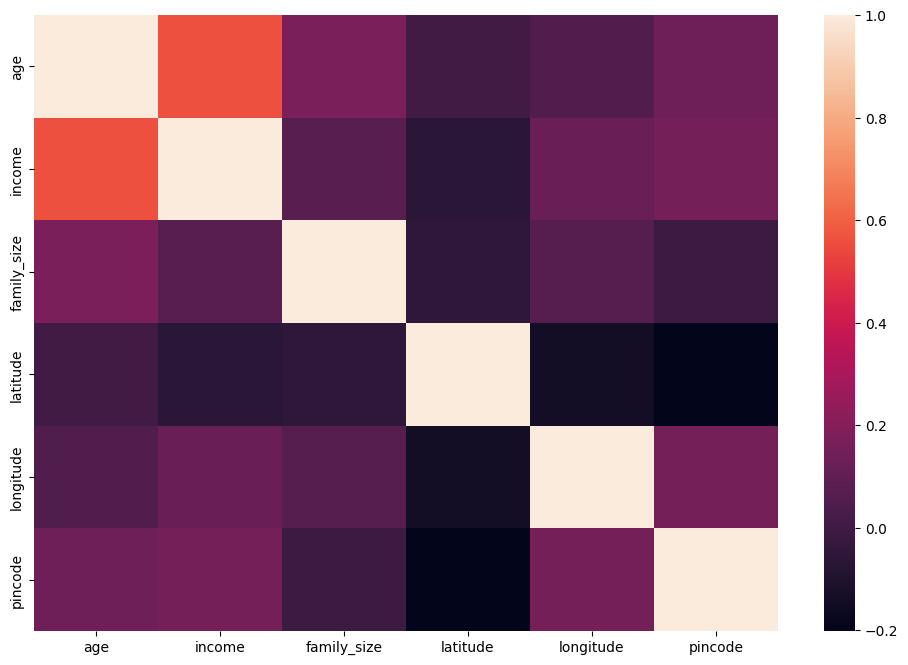

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes([int,"float"]).corr())

In [38]:
df.drop(columns=["pincode"],inplace=True)

In [39]:
df['gender'] = df['gender'].astype('category')
df = pd.get_dummies(df, columns=['gender'], prefix='gender')

In [40]:
df.head()

,age,relationship,work,income,degree,family_size,latitude,longitude,output,feedback,gender_Female,gender_Male
0,20,Single,Student,0,Post Graduate,4,12.9766,77.5993,Yes,Positive,True,False
1,24,Single,Student,1,Graduate,3,12.9770,77.5773,Yes,Positive,True,False
2,22,Single,Student,1,Post Graduate,3,12.9551,77.6593,Yes,Negative,False,True
3,22,Single,Student,0,Graduate,6,12.9473,77.5616,Yes,Positive,True,False
4,22,Single,Student,1,Post Graduate,4,12.9850,77.5533,Yes,Positive,False,True
